In [1]:
import tensorflow_datasets as tfds # TensorFlow에서 제공하는 다양한 데이터셋을 쉽게 로드하기 위한 라이브러리 (현재 코드에서 직접 사용되진 않음)
import os # 운영체제 기능(파일 경로 등) 사용
import numpy as np # 수치 계산 라이브러리 (TensorFlow 텐서 처리에 기반이 됨)
import tensorflow as tf # Google의 핵심 딥러닝 프레임워크
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
from tensorflow import keras # TensorFlow의 고수준 API (모델 구축 및 훈련 용이)
import pickle # 파이썬 객체를 파일로 저장/로드하는 모듈 (현재 코드에서 직접 사용되진 않음)
from tensorflow.keras import layers, models # Keras의 레이어와 모델 구성 요소
from tensorflow.keras.applications import MobileNetV2 # 사전 학습된 경량 CNN 모델 (전이 학습에 사용)


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
학습용 이미지 형태: (50000, 32, 32, 3)
학습용 레이블 형태: (50000, 1)
테스트용 이미지 형태: (10000, 32, 32, 3)
테스트용 레이블 형태: (10000, 1)
<module 'keras.datasets.cifar100' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/cifar100/__init__.py'>

--- 클래스 이름 정보 ---
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 

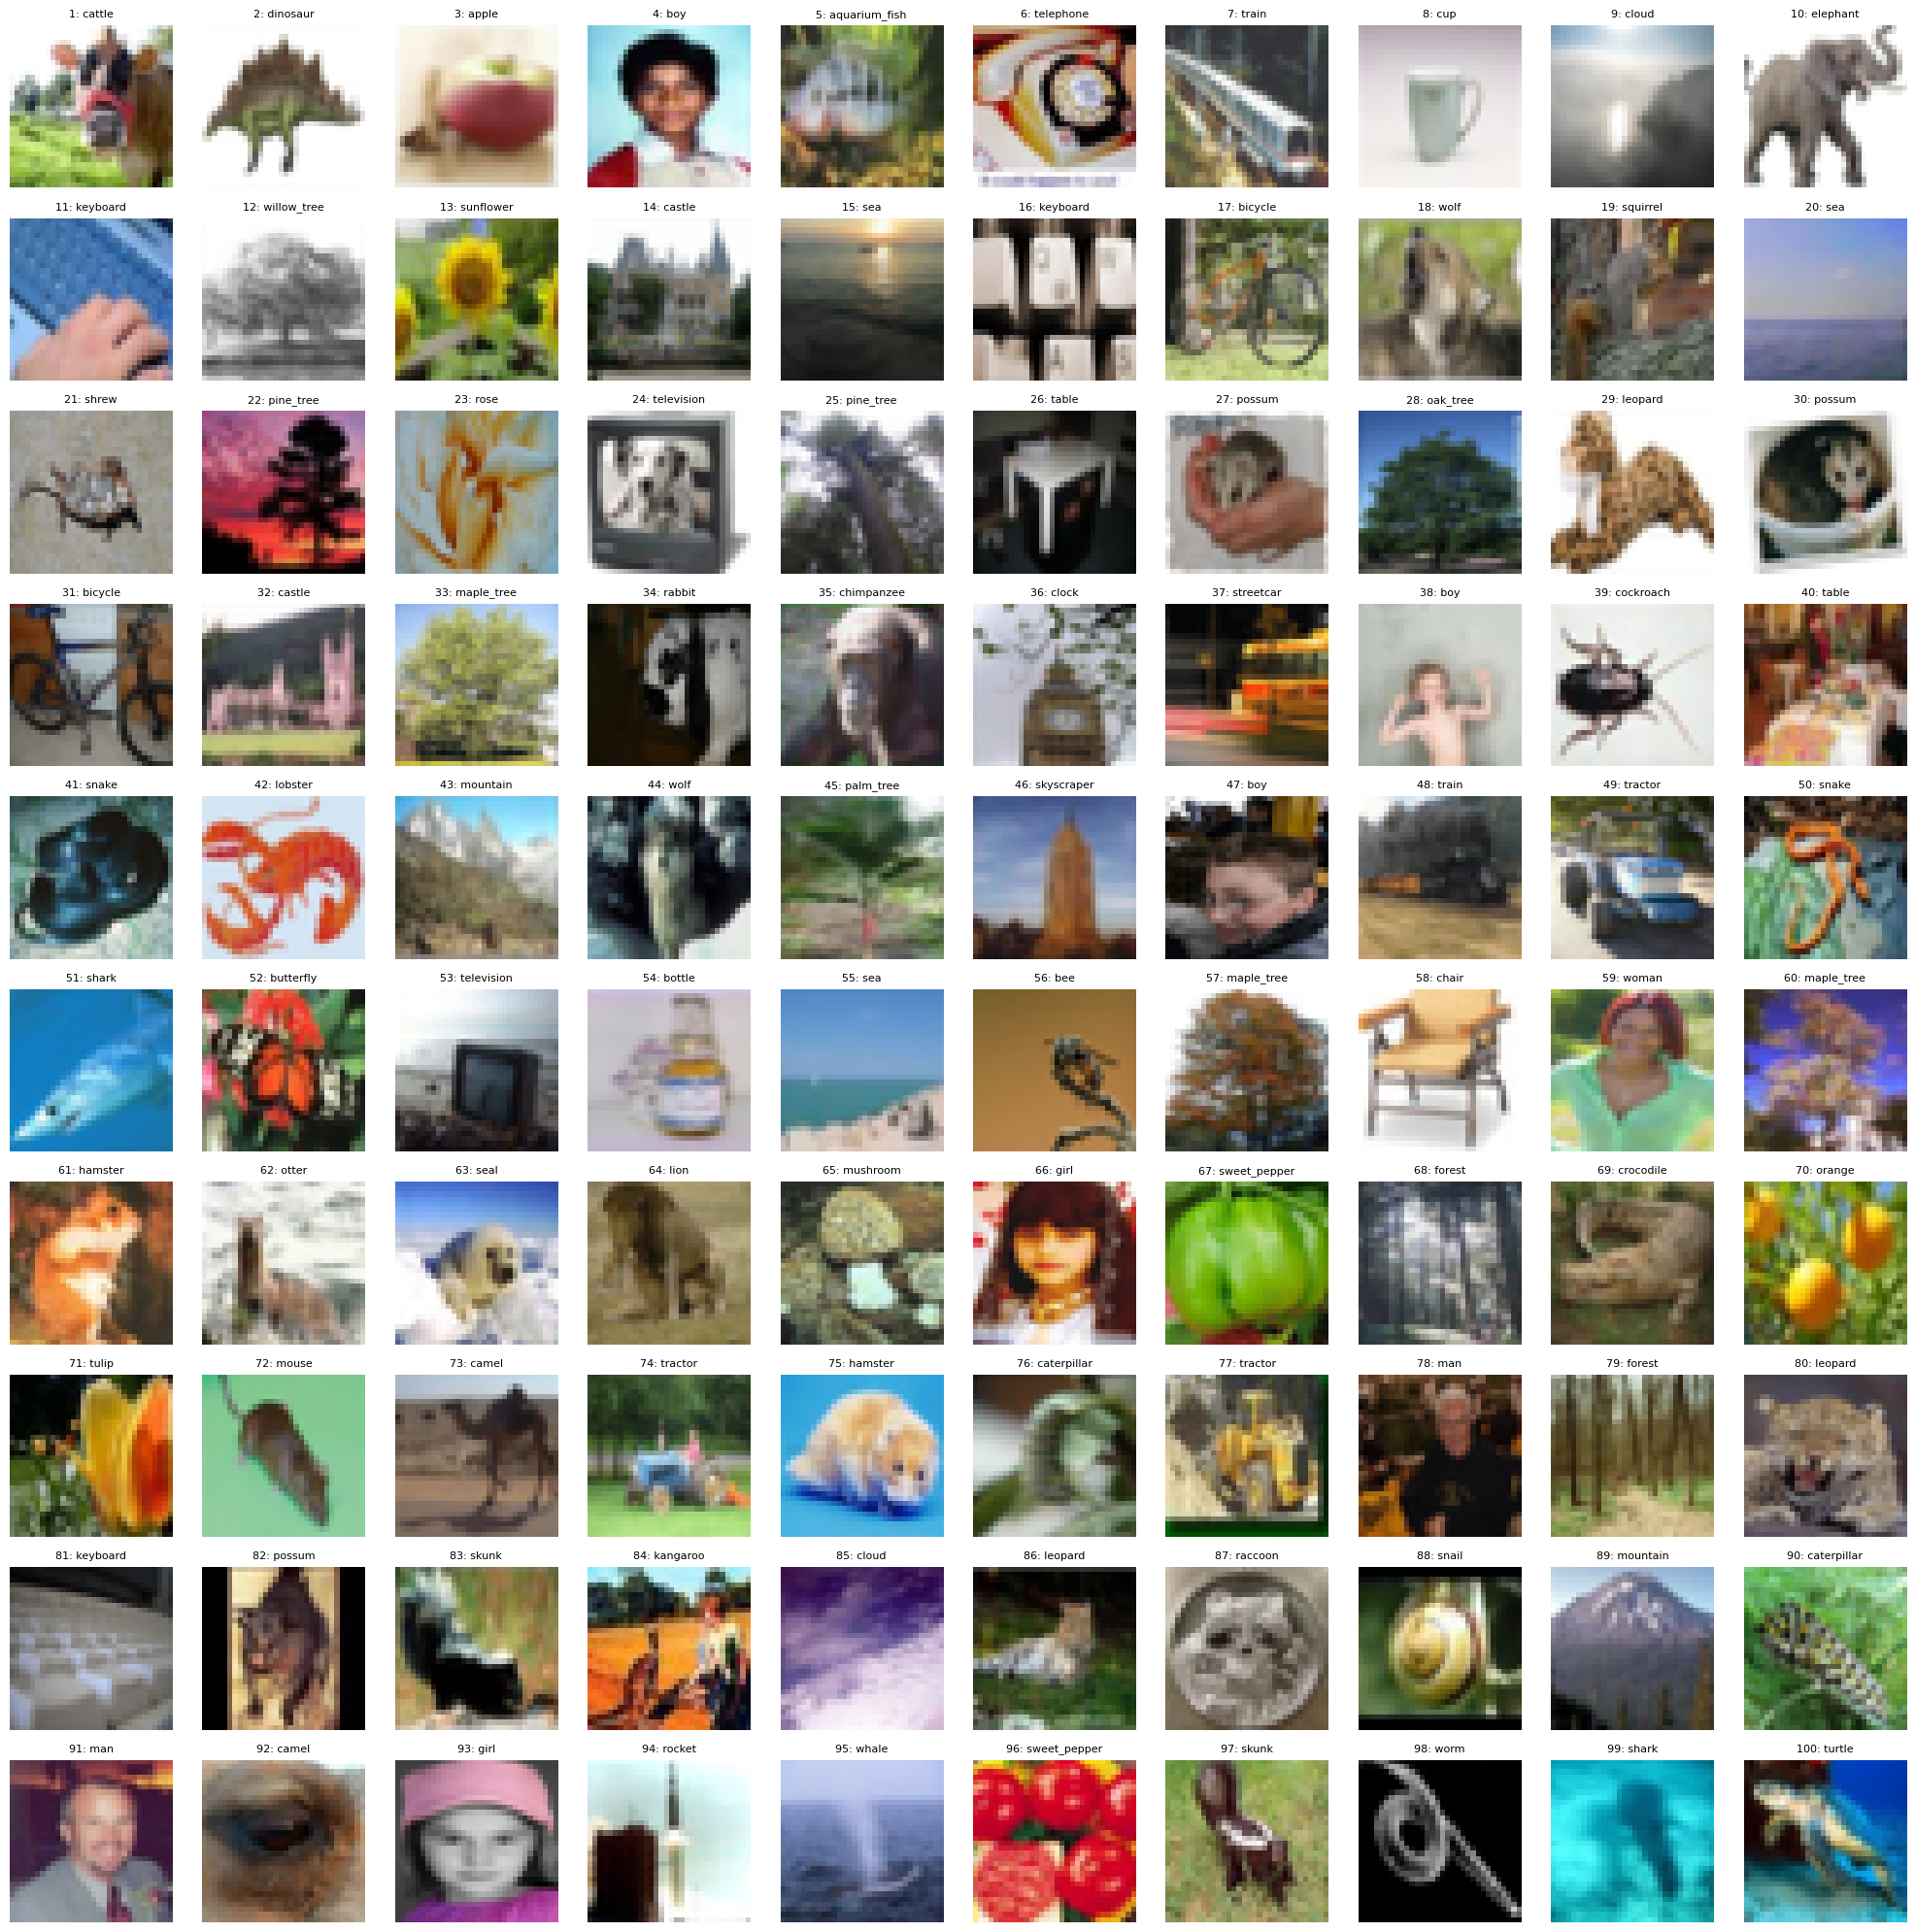

In [2]:
# --- 1. 데이터셋 로드 및 확인 ---
# CIFAR-100 데이터셋 로드
# (x_train, y_train): 학습용 이미지와 레이블
# (x_test, y_test): 테스트용 이미지와 레이블


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

print(f"학습용 이미지 형태: {x_train.shape}") # (50000, 32, 32, 3) -> 5만개, 32x32 픽셀, 3채널(RGB)
print(f"학습용 레이블 형태: {y_train.shape}") # (50000, 1) -> 5만개 레이블 (클래스 인덱스)
print(f"테스트용 이미지 형태: {x_test.shape}") # (10000, 32, 32, 3) -> 1만개 이미지
print(f"테스트용 레이블 형태: {y_test.shape}") # (10000, 1)
print(tf.keras.datasets.cifar100) # 데이터셋 모듈 자체 출력


cifar100_fine_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank',
    'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip',
    'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]
print("\n--- 클래스 이름 정보 ---")
print(cifar100_fine_labels)
print(f"\n총 클래스 수: {len(cifar100_fine_labels)}개")


# --- 2. 데이터 전처리 (정규화) ---
# 이미지 픽셀 값 정규화(Normalization): 0~255 범위의 정수 값을 0.0~1.0 범위의 실수로 변환
# 딥러닝 모델의 학습 안정성과 성능 향상에 필수적인 단계

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 레이블과 이미지 시각화
# 로드된 데이터와 레이블을 시각적으로 확인
plt.figure(figsize=(20, 20)) # 플롯의 크기를 키워 100개 이미지를 잘 보이게 함



for i in range(100): # 첫 100개 이미지를 10x10 그리드에 표시
    plt.subplot(10, 10, i + 1) # 10행 10열 중 i+1번째 위치에 서브플롯 생성
    plt.imshow(x_train[i]) # 정규화된 이미지 표시 (0~1 값이지만 plt가 자동으로 맵핑)

    label_index = y_train[i][0] # 레이블 배열에서 클래스 인덱스 값 추출
    label_name = cifar100_fine_labels[label_index] # 인덱스를 사용하여 클래스 이름 가져오기

    plt.title(f"{i+1}: {label_name}", fontsize=8) # 이미지 제목 설정 (이미지 제목에 클래스 이름과 인덱스 번호를 표시)
    plt.axis('off') # 축 눈금 제거

plt.tight_layout() # 서브플롯들이 겹치지 않도록 간격 자동 조절
plt.show() # 시각화 결과 출력


In [7]:
# --- 4. 전이 학습을 위한 MobileNetV2 모델 구성 ---
# 1. MobileNetV2 모델 불러오기 (사전 학습된 가중치 포함)
# MobileNetV2: 모바일 장치에 최적화된 경량 컨볼루션 신경망
# weights='imagenet': 대규모 이미지넷(ImageNet) 데이터셋으로 사전 학습된 가중치 사용 (전이 학습 핵심)
# include_top=False: 이미지넷 분류를 위한 최종 Dense 레이어(분류기)를 제외하고 특징 추출기 부분만 가져옴
# input_shape=(224, 224, 3): MobileNetV2가 학습될 때 사용한 표준 입력 크기 (일반적으로 사용)

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# 2. 전이 학습을 위해 MobileNetV2의 기존 레이어를 동결(freeze)시킴.
# MobileNetV2의 사전 학습된 가중치를 학습 중 업데이트하지 않도록 설정 (특징 추출기 보존)
base_model.trainable = False

# 3. 모델 위에 새로운 레이어 추가 (커스텀 분류기) - Sequential API 대신 Functional API 사용
inputs = tf.keras.Input(shape=(32, 32, 3)) # 입력 레이어 정의 (CIFAR-100의 원본 크기)

# 데이터 증강 (Data Augmentation) 레이어 추가
# 실시간으로 이미지 변형을 가하여 모델이 다양한 조건의 이미지를 학습하게 함 (과적합 방지)
x = layers.RandomFlip("horizontal")(inputs) # 좌우 반전
x = layers.RandomRotation(0.1)(x) # 10% 회전 (라디안 기준)
x = layers.RandomZoom(0.1)(x) # 10% 줌

# MobileNetV2의 입력 크기에 맞게 이미지 리사이징 (32x32 -> 224x224)
x = layers.Resizing(224, 224)(x)

# MobileNetV2 모델을 통과시킴.
# training=False: 동결된 모델을 추론(inference) 모드로 실행하도록 명시적으로 설정.
# 이는 MobileNetV2 내부의 Batch Normalization 레이어가 훈련 시의 통계 대신 추론 시의 통계(Moving Average)를 사용하게 합니다.
x = base_model(x, training=False)

# 전역 평균 풀링(Global Average Pooling 2D) 레이어를 추가.
# 특징 맵(Feature Map) 전체의 평균을 계산하여 1차원 벡터로 만듭니다. (파라미터 수를 줄이는 효과)
x = layers.GlobalAveragePooling2D()(x)

# 드롭아웃 (Dropout) 레이어를 추가하여 과적합을 방지.
x = layers.Dropout(0.2)(x) # 20%의 뉴런을 랜덤하게 끔

# 최종 Dense 레이어를 추가하여 100개의 클래스를 분류.
# activation='softmax': 다중 클래스 분류의 최종 출력 함수. 각 클래스에 속할 확률을 출력합니다.
outputs = layers.Dense(100, activation='softmax')(x)

# 입력(inputs)과 출력(outputs)을 연결하여 최종 모델을 구성.
model = models.Model(inputs, outputs)

# 모델 구조 요약 출력 (각 레이어의 이름, 출력 형태, 파라미터 수 확인 가능)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_1 (RandomFlip)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_1 (Resizing)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │       128,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,386,084 (9.10 MB)

 Trainable params: 128,100 (500.39 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

1. 전이 학습 (Transfer Learning)


    핵심: 이미 대규모 데이터셋 (ImageNet)으로 학습되어 일반적인 시각적 특징(경계선, 질감, 패턴 등)을 잘 추출하는 방법을 아는 base_model (MobileNetV2)의 지식을 가져와, 우리의 작은 데이터셋 (CIFAR-100) 문제에 전달하여 사용.


    코드 역할:
    weights='imagenet': ImageNet 학습 가중치 로드.
    base_model.trainable = False: 기존 MobileNetV2의 가중치 동결. 새로운 데이터로 훈련시키지 않고 특징 추출기로만 사용.


    새로운 분류기 추가: GlobalAveragePooling2D와 Dense(100, activation='softmax') 레이어는 CIFAR-100의 100개 클래스에 맞게 새로 학습되는 부분.


2. 데이터 증강 (Data Augmentation)


    핵심: CIFAR-100은 작은 이미지(32x32)로 구성되어 있으며 데이터 양이 부족할 수 있음. RandomFlip, RandomRotation, RandomZoom과 같은 레이어를 통해 기존 학습 데이터를 변형하여 모델에게 더 다양한 학습 샘플을 제공.


    효과: 모델이 이미지의 위치, 방향, 크기 등 변화에 덜 민감해지도록 만들며, 이는 과적합(Overfitting)을 줄이고 일반화 성능을 크게 향상.
    

    이 코드는 실제 산업 현장이나 대회에서 제한된 데이터로 높은 성능을 얻고자 할 때 가장 일반적으로 사용하는 딥러닝 기법들을 한 번에 보여줌

In [11]:
# --- 4. 모델 컴파일  ---
# CIFAR-100은 100개 클래스의 분류 문제이므로 이에 맞는 설정.

# model.compile()을 호출하여 모델의 훈련 설정을 정의.
model.compile(
    # 1. 옵티마이저: Adam이 가장 흔하게 사용되는 옵티마이저 중 하나.
    optimizer='adam',
    # 2. 손실 함수: 레이블(y_train)이 정수 인덱스(0, 1, 2, ...) 형태이므로 SparseCategoricalCrossentropy를 사용.
    # 만약 레이블을 One-Hot Encoding (y_train = to_categorical(y_train)) 했다면 'categorical_crossentropy'를 사용.
    loss='sparse_categorical_crossentropy',
    # 3. 평가 지표: 분류 모델의 성능을 정확도(accuracy)로 측정합니다.
    metrics=['accuracy']
)

# --- 5. 콜백 (Callback) 설정 ---

# EarlyStopping (조기 종료) 콜백 설정

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',         # 모니터링할 지표: 검증 손실(Validation Loss)
    patience=5,                 # 인내심: 5 에포크 동안 개선(val_loss 감소)이 없으면 훈련 중단
    verbose=1,                  # 로그 메시지 출력 (중단 시점 알림)
    restore_best_weights=True   # 훈련 중 가장 val_loss가 낮았을 때의 가중치로 모델 복원
)

# 학습률 감소 콜백 설정
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',         # 모니터링할 지표: 검증 손실
    factor=0.5,                 # 개선이 없을 때 학습률을 50% (절반)로 감소
    patience=3,                 # 3 에포크 동안 개선이 없으면 (val_loss 감소 없음) 학습률 감소 조치 실행
    verbose=1,                  # 학습률이 감소할 때 로그 메시지 출력
    min_lr=1e-5                 # 학습률의 최소 한계를 0.00001로 설정 (너무 작아지는 것 방지)
)

# --- 6. 모델 훈련 (fit) ---
# model.fit: 모델 학습 시작
history = model.fit(
    x_train, y_train,
    epochs=50,                        # 최대 50 에포크 동안 학습
    validation_data=(x_test, y_test), # 검증 데이터 설정 (매 에포크마다 성능 체크, val_loss/val_accuracy 계산)
    callbacks=[early_stop, lr_scheduler] # 설정된 콜백 목록 적용
)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 66ms/step - accuracy: 0.2411 - loss: 3.2214 - val_accuracy: 0.4541 - val_loss: 2.0888 - learning_rate: 0.0010
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.3636 - loss: 2.5188 - val_accuracy: 0.4751 - val_loss: 2.0433 - learning_rate: 0.0010
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.3952 - loss: 2.3902 - val_accuracy: 0.4777 - val_loss: 2.0742 - learning_rate: 0.0010
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.4025 - loss: 2.3457 - val_accuracy: 0.4925 - val_loss: 2.0115 - learning_rate: 0.0010
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.4123 - loss: 2.2976 - val_accuracy: 0.5028 - val_loss: 1.9575 - learning_rate: 0.0010
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.4196 - loss: 2.2755 - val_accuracy: 0.5075 - val_loss: 1.9628 - learning_rate: 0.0010
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 64ms/step - accur

In [12]:
# --- 3. 모델 평가 및 저장 ---

# 모델 평가 (최적의 가중치가 복원된 모델로 테스트 데이터셋 평가)
loss, accuracy = model.evaluate(x_test, y_test)
print(f"테스트 데이터셋 정확도: {accuracy:.4f}")

# 모델 저장 (HDF5 형식)
# .h5 파일은 모델의 아키텍처, 가중치, 훈련 설정(옵티마이저 등)을 모두 포함하는 표준 파일 형식
# 사용자님 목표인 'Django에서 불러올 수 있도록' 저장하는 핵심 단계입니다.
model.save('cifar100_mobilenetv2_model2.h5')
print("모델이 'cifar100_mobilenetv2_model2.h5' 파일로 저장되었습니다.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.5438 - loss: 1.7664


테스트 데이터셋 정확도: 0.5355
모델이 'cifar100_mobilenetv2_model2.h5' 파일로 저장되었습니다.


알아야 할 핵심 개념 (Callbacks)


이번 코드의 핵심은 Callbacks. 이는 훈련 중 특정 이벤트(에포크 시작/종료, 배치 시작/종료)에 자동으로 실행되는 함수들의 집합이며, 딥러닝 훈련을 자동화하고 최적화하는 데 필수적.

1. EarlyStopping (조기 종료)

    목표: 과적합(Overfitting) 방지.

    원리: 모델이 훈련 데이터에서는 잘 맞추지만, 검증 데이터(val_loss)에서는 성능 개선이 멈추거나 나빠지기 시작할 때 훈련을 중단.

    patience=5의 의미: 검증 손실이 5 에포크 동안 최저 기록을 갱신하지 못하면, 훈련을 멈춤.

    restore_best_weights=True의 중요성: 조기 종료 시, 가장 성능이 좋았던 에포크의 가중치를 모델에 복원. (중단 시점의 가중치가 아니라, 최고의 성능을 냈던 지점의 가중치를 저장)

2. ReduceLROnPlateau (학습률 감소)
    목표: 훈련 정체(Plateau) 극복.

    원리: 훈련 후반부에 손실 함수가 평탄한 영역(Plateau)에 도달하여 학습이 더 이상 진행되지 않을 때, 학습률(Learning Rate)을 점진적으로 감소시켜 손실 함수의 더 깊은 최저점(Minimum)을 찾도록 도움.

    factor=0.5의 의미: 학습률을 절반으로 줄여 세밀한 탐색을 유도.

    patience=3의 의미: 3 에포크 연속으로 val_loss가 개선되지 않으면 학습률을 감소시킴. (너무 자주 감소하면 훈련 속도가 느려지므로 적절한 인내심 설정이 중요.)

3. 모델 저장 (model.save)

    Django에서 불러올 수 있도록 저장. model.save('파일이름.h5')는 Keras 모델을 HDF5 형식으로 저장하는 표준 방식.

    이 파일에는 모델 구조, 훈련된 가중치, 그리고 훈련 설정(컴파일 정보)이 모두 포함되어 있어, 배포 환경(예: Django 기반 웹 서비스)에서 tf.keras.models.load_model('파일이름.h5') 함수 하나로 모델을 즉시 로드하고 예측에 사용함.

  결론: 과적합을 방지하면서 최적의 가중치를 찾고(EarlyStopping), 훈련이 막힐 때 학습률을 조절하여(ReduceLROnPlateau), 최종적으로 배포 가능한 파일로 저장(model.save)하는 실용적인 딥러닝 워크플로우의 정수이다.
